# Geographic Projections

Types:

- Polar Planar
- Conic
- Cylindrical
  - Transverse Mercator - cylinder is tangent along a meridian (90 deg)
- "Origami" (Orange peel type)

## Projected Coordinate Systems

- Local Work
  - State Plane Coordinate System
  - UTM (Universal Transverse Mercator)
- Regional / continental work
  - North American Albers Equal Area __Conic__
  - North American Lambert Conformal __Conic__
  - ...

In [1]:
import pandas as pd

# dataset "frankfurt2_westendtower" taken from: https://www.tu-chemnitz.de/projekt/smartLoc/gnss_dataset.html.en#Datasets

# df = pd.read_csv("coordinates-1.csv")
df_full = pd.read_csv('datasets/frankfurt2_westendtower/BESTPOS.csv', sep=';')
df = pd.DataFrame({
    'lat': df_full["Latitude (lat) [deg]"],
    'lon': df_full["Longitude (lon) [deg]"]
})
df.head()

,lat,lon
0,50.110918,8.661092
1,50.110918,8.661093
2,50.110918,8.661092
3,50.110918,8.661092
4,50.110918,8.661093


# Plot Lat, Lon (unmodified)

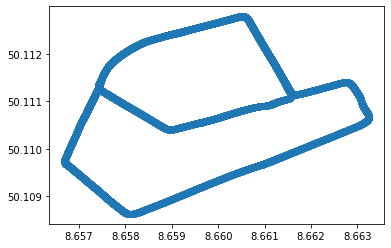

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px

plt.scatter(x=df['lon'], y=df['lat'])
plt.show()

# Plot UTM 

Zone: 32U


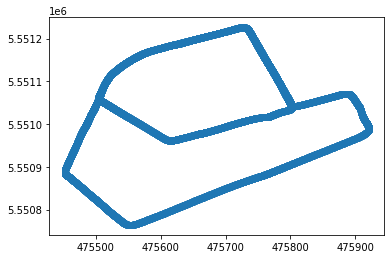

In [3]:
import utm

# (easting, northing, zone_number, zone_letter) = utm.from_latlon(50.11, 8.6)
# (easting, northing, zone_number, zone_letter) = utm.from_latlon(np.array([50.11, 49.1]), np.array([8.6, 8.4]))
(easting, northing, zone_number, zone_letter) = utm.from_latlon(df['lat'].to_numpy(), df['lon'].to_numpy())
print("Zone: " + str(zone_number) + zone_letter)

plt.scatter(x=easting, y=northing)
plt.show()
# px.scatter(x=easting, y=northing, width=600, height=400)